In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Скачиваем данные

In [3]:
df_train = pd.read_csv('./X_train.csv')
df_test = pd.read_csv('./X_test.csv')

df_target = pd.read_csv('./y_train.csv')
df_test_sample = pd.read_csv('./y_test_sample.csv')

In [4]:
df_train.head()


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [5]:
df_test.head()



,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0


In [6]:
df_full = pd.concat([df_train, df_target], axis=1, ignore_index=False)

In [7]:
df_full.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0


# Краткий анализ имеющихся данных

###### Баланс классов

In [8]:
df_full['target'].value_counts(normalize=True)

0    0.933108
1    0.066892
Name: target, dtype: float64

###### Проверка пропусков

In [9]:
pd.isnull(df_full).sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
target                            0
dtype: int64

###### Проверка типов данных

In [10]:
df_full.dtypes

credit_card_utilization       float64
age                             int64
overdue_30_59_days              int64
debt_to_income                float64
monthly_income                float64
credits_loans                   int64
overdue__more_than_90_days      int64
mortgage_loans                  int64
overdue_60_89_days              int64
family_members                float64
target                          int64
dtype: object

###### Проверка количества уникальных

In [11]:
df_full.nunique()

credit_card_utilization        97475
age                               86
overdue_30_59_days                15
debt_to_income                102217
monthly_income                 82956
credits_loans                     59
overdue__more_than_90_days        16
mortgage_loans                    27
overdue_60_89_days                13
family_members                    13
target                             2
dtype: int64

###### Просмотр некоторых зависимостей

In [12]:
df_full['family_members'].value_counts(normalize=True)

0.0     0.594737
1.0     0.181078
2.0     0.133015
3.0     0.064465
4.0     0.019765
5.0     0.005259
6.0     0.001085
7.0     0.000323
8.0     0.000186
10.0    0.000049
9.0     0.000020
13.0    0.000010
20.0    0.000010
Name: family_members, dtype: float64

###### Выбор категориальных и количественных признаков

In [13]:
num = ['age', 'monthly_income', 'credit_card_utilization',
      'debt_to_income', 'credits_loans', 'mortgage_loans', 
      'family_members','overdue_30_59_days',
       'overdue_60_89_days',
      'overdue__more_than_90_days']

target = 'target'

# Предобработка данных

#### Drop columns with NaN

In [34]:
columns_to_drop = ['monthly_income', 'family_members']
df_full.drop(columns=columns_to_drop, inplace=True)

In [35]:
df_full

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,target
0,0.000000,56,0,0.504328,9,0,1,0,0
1,0.170659,45,1,2.405860,5,0,0,0,0
2,0.342176,75,1,0.445066,9,0,3,0,0
3,0.046219,50,0,0.814508,12,0,1,0,0
4,0.679556,58,0,0.390311,15,0,4,0,0
5,0.874546,32,0,0.000000,0,0,0,0,0
6,0.525989,69,2,0.170485,8,0,1,1,0
7,0.013340,90,0,0.241279,4,0,1,0,0
8,0.115604,41,0,0.449502,19,0,4,0,0
9,0.002793,81,1,0.308468,21,0,1,0,0


###### Заполнение пропусков

In [14]:
df_full['monthly_income'] = df_full['monthly_income'].fillna(0)
df_full['family_members'] = df_full['family_members'].fillna(0)

###### Проверка заполнения пропусков

In [15]:
pd.isnull(df_full).sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
target                        0
dtype: int64

In [16]:
df = df_full.iloc[:-100]
df_test = df_full.iloc[-100:]


In [17]:
df.target = df.target.astype(int)

###### Выбираем признаки для обучения

In [18]:
train_cols = df.columns.difference([target])

In [19]:
train_cols

Index(['age', 'credit_card_utilization', 'credits_loans', 'debt_to_income',
       'family_members', 'monthly_income', 'mortgage_loans',
       'overdue_30_59_days', 'overdue_60_89_days',
       'overdue__more_than_90_days'],
      dtype='object')

# Генерация признаков

###### Полиномиальные признаки

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
pf = PolynomialFeatures(degree=2)

In [22]:
# df = pf.fit_transform(df)

# Выбор модели и оптимизация

###### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [24]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [25]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [26]:
GS_dtc.fit(X=df[train_cols], y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [27]:
GS_dtc.best_score_

0.6644762691710736

In [28]:
df[train_cols].head()

,age,credit_card_utilization,credits_loans,debt_to_income,family_members,monthly_income,mortgage_loans,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,56,0.000000,9,0.504328,5.0,6823.894458,1,0,0,0
1,45,0.170659,5,2.405860,0.0,356.580765,0,1,0,0
2,75,0.342176,9,0.445066,0.0,20349.895825,3,1,0,0
3,50,0.046219,12,0.814508,3.0,2894.368968,1,0,0,0
4,58,0.679556,15,0.390311,2.0,24833.227614,4,0,0,0


###### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
import random

In [31]:
random.seed(123)

In [32]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [33]:
GS_LR.fit(X=df[train_cols], y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [94]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 0.014508287784959401}

In [95]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

0.699670543334869

In [96]:
GS_LR

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

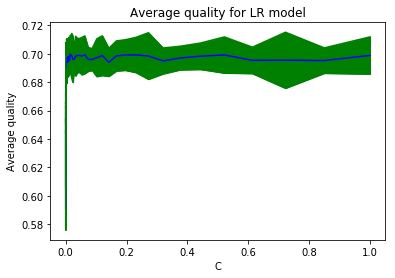

In [97]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

###### kNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [100]:
GS_kNN.fit(df[train_cols], df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [101]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 98}

In [102]:
# Лучший показатель ROC_AUC
GS_kNN.best_score_

0.6279347747645829

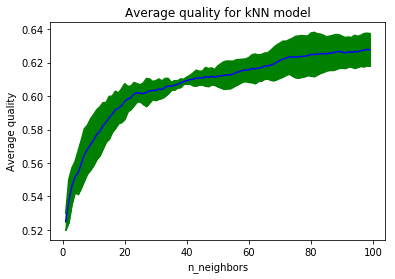

In [103]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Нормировка данных

Нормируем данные и проверяем качество

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
ss = StandardScaler(with_mean=True, with_std=True)

In [106]:
X_scaled = ss.fit_transform(df[train_cols])

In [107]:
X_test_scaled = ss.transform(df_test[train_cols])

# Модели на нормированных данных

###### Decision Tree Classifier

In [108]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [109]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [110]:
# Заменяем df[train_cols] на X_scaled
GS_dtc.fit(X=X_scaled, y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [111]:
# Алгоритмы на деревьях не чуствительны к масштабированию данных, поэтому скор не изменился
GS_dtc.best_score_

0.6643150383349541

Скор не большой, так как мы перебрали не все параметры

Попробуйте факультативно попробовать поварьировать другие параметры и добиться лучшего ROC_AUC

###### Logistic Regression

In [112]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [113]:
GS_LR.fit(X=X_scaled, y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [114]:
# Лучший параметр "C" сильно уменьшился,
# Так как мы нормировали данные и теперь надо меньше штрафовать большие веса
GS_LR.best_params_

{'C': 1e-07}

In [115]:
GS_LR.best_score_

0.7150933286685235

###### kNN

In [116]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [117]:
GS_kNN.fit(X_scaled, df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [118]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 98}

In [119]:
# Показатель метрики ROC_AUC сильно увеличился после нормировки (с 0.59 до 0.75),
# Так как метрические алгоритмы очень чуствительны к ненормированным данным.
GS_kNN.best_score_

0.7685681262220746

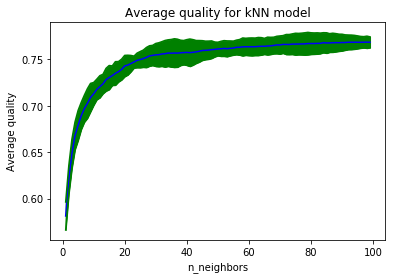

In [120]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Blending

Подробнее про ансамбли хорошо объясняется здесь:

https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [121]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

###### Выбираем наши лучшие модели (модели при лучших параметрах)

In [122]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [123]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [124]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, df[target].values)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=VotingClassifier(estimators=[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=98, p=2,
           weights='uniform')), ('LR', LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
...bose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8], [0.30000000000000004, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6000000000000001, 0.3999999999999999], [0.7000000000000001, 0.29999999999999993], [0.8, 0.19999999999999996], [0.9, 0.09999999999999998], [1.0, 0.0]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [125]:
grid.best_params_

{'weights': [0.4, 0.6]}

In [126]:
# Лучший показатель ROC_AUC
grid.best_score_

0.7724400110943923

In [132]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля kNN и LogReg =", grid.best_score_)

Качество алгоритма kNN = 0.7685681262220746
Качество алгоритма LogReg = 0.7150933286685235
Качество алгоритма ансамбля kNN и LogReg = 0.7724400110943923


Стало лучше)

### Делаем предсказания на тесте

In [130]:
model = grid.best_estimator_

In [135]:
model.fit(X_scaled, df['target'])

VotingClassifier(estimators=[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=98, p=2,
           weights='uniform')), ('LR', LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[0.4, 0.6])

In [136]:
preds = model.predict_proba(X_test_scaled)[:, 1]

### Готовим предсказания на отправку

In [138]:
df_test['target'] = preds

In [139]:
df_test = df_test[['target']]

In [140]:
df_test.to_csv('./submition.csv')

_____

_____

_____

_____

_____

_____

_____